1. Loading the books as Plain text

In [4]:
import os, glob, re

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pwd

'/content'

In [5]:
folder = "drive/MyDrive/dataset/"

files = glob.glob(folder + "*.txt")
files.sort()
files

['drive/MyDrive/dataset/A Christmas Carol by Charles Dickens.txt',
 'drive/MyDrive/dataset/A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens.txt',
 'drive/MyDrive/dataset/A Monograph on the Sub-class Cirripedia (Volume 1 of 2) by Charles Darwin.txt',
 'drive/MyDrive/dataset/A Tale of Two Cities by Charles Dickens.txt',
 'drive/MyDrive/dataset/American Notes by Charles Dickens.txt',
 'drive/MyDrive/dataset/Bleak House by Charles Dickens.txt',
 'drive/MyDrive/dataset/David Copperfield by Charles Dickens.txt',
 'drive/MyDrive/dataset/De afstamming van den mensch en de seksueele teeltkeus, deel 2 (van 2) by Darwin.txt',
 'drive/MyDrive/dataset/Dombey and Son by Charles Dickens.txt',
 'drive/MyDrive/dataset/Great Expectations by Charles Dickens.txt',
 'drive/MyDrive/dataset/Hard Times by Charles Dickens.txt',
 'drive/MyDrive/dataset/Index of the Project Gutenberg Works of Charles Darwin by Charles Darwin.txt',
 'drive/MyDrive/dataset/Insectivorous Plants by Cha

In [7]:
txts = []
titles = []

for n in files:
    f = open(n, encoding='utf-8-sig')   # Open each books
    data = re.sub(r'[\W_]+', ' ', f.read())  # Remove all non-alpha-numeric characters
    if len(data) == 0:  # Remove empty books
        continue
    txts.append(data)
    titles.append(os.path.basename(n).replace(".txt", ""))

[(len(t), title) for t,title in zip(txts, titles)]

[(174502, 'A Christmas Carol by Charles Dickens'),
 (169571,
  'A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens'),
 (786179,
  'A Monograph on the Sub-class Cirripedia (Volume 1 of 2) by Charles Darwin'),
 (741879, 'A Tale of Two Cities by Charles Dickens'),
 (584589, 'American Notes by Charles Dickens'),
 (1876768, 'Bleak House by Charles Dickens'),
 (1861956, 'David Copperfield by Charles Dickens'),
 (927384,
  'De afstamming van den mensch en de seksueele teeltkeus, deel 2 (van 2) by Darwin'),
 (1925578, 'Dombey and Son by Charles Dickens'),
 (970256, 'Great Expectations by Charles Dickens'),
 (565237, 'Hard Times by Charles Dickens'),
 (109505,
  'Index of the Project Gutenberg Works of Charles Darwin by Charles Darwin'),
 (919684, 'Insectivorous Plants by Charles Darwin'),
 (1821035, 'Little Dorrit by Charles Dickens'),
 (1813996, 'Martin Chuzzlewit by Charles Dickens'),
 (1096508, 'More Letters of Charles Darwin — Volume 1 by Charles Darwin'),
 (17

In [8]:
input_book = input("Enter the book name with author (book_name by  author_name): ")

for i in range(len(titles)):
    if titles[i] == input_book:
        book_index = i

print(book_index)

Enter the book name with author (book_name by  author_name): On the Origin of Species By Means of Natural Selection by Charles Darwin
18


In [12]:
import nltk
# nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
stopwords = set(nltk.corpus.stopwords.words('english'))

In [14]:

txts_lower_case = [t.lower() for t in txts]

txts_split = [t.split() for t in txts_lower_case]

texts = [[word for word in txt if word not in stopwords] for txt in txts_split]

texts[book_index][:10]   # Print the first 10 tokens of input book

['project',
 'gutenberg',
 'ebook',
 'origin',
 'species',
 'means',
 'natural',
 'selection',
 'ebook',
 'use']

In [15]:
lemmatizer = nltk.stem.WordNetLemmatizer()

texts_stem = [[lemmatizer.lemmatize(word) for word in text] for text in texts]

texts_stem[book_index][:10]

['project',
 'gutenberg',
 'ebook',
 'origin',
 'specie',
 'mean',
 'natural',
 'selection',
 'ebook',
 'use']

In [16]:
from gensim import corpora

# Create a dictionary from the stemmed tokens
dictionary = corpora.Dictionary(texts_stem)

# Create a bag-of-words model for each book, using the previously generated dictionary
bows = [dictionary.doc2bow(text) for text in texts_stem]

# Print the first five elements of the On the Origin of species' BoW model
bows[book_index][:5]

[(1, 3), (3, 58), (4, 6), (5, 5), (7, 13)]

In [17]:
# Import pandas to create and manipulate DataFrames
import pandas as pd

# Convert the BoW model for input book into a DataFrame
df_bow_origin = pd.DataFrame()

# Add the column names to the DataFrame
df_bow_origin['index'] = [i[0] for i in bows[book_index] if i]
df_bow_origin['occurrences'] = [i[1] for i in bows[book_index] if i]

# Add a column containing the token corresponding to the dictionary index
df_bow_origin['token'] = [dictionary[index] for index in df_bow_origin.index]

# Sort the DataFrame by descending number of occurrences and print the first 10 values
df_bow_origin.occurrences.sort_values(ascending = False).head(10)

3366    1546
1285     654
1160     524
2010     516
782      513
288      508
2112     489
1147     453
4150     420
3178     403
Name: occurrences, dtype: int64

In [20]:
# Load the gensim functions that will allow us to generate tf-idf models
from gensim.models import TfidfModel

# Generate the tf-idf model
model = TfidfModel(bows)

# Print the model for input book
model[bows[book_index]]

[(4, 0.005462897678540916),
 (5, 0.004147687995435615),
 (7, 0.006350156208210038),
 (9, 0.01296119523716762),
 (10, 0.011989587931276894),
 (11, 0.003641931785693944),
 (12, 0.005462897678540916),
 (14, 0.00043012733337924965),
 (42, 0.0036839999217075942),
 (43, 0.00109933407152227),
 (46, 0.0012279999739025313),
 (47, 0.0006139999869512657),
 (48, 0.0020454361379505185),
 (49, 0.005197938831230274),
 (54, 0.0007535011330576869),
 (58, 0.0022605033991730606),
 (61, 0.000829537599087123),
 (64, 0.000910482946423486),
 (68, 0.0021799250784139807),
 (70, 0.00455241473211743),
 (71, 0.005449812696034951),
 (78, 0.0028439467910231003),
 (79, 0.0006139999869512657),
 (83, 0.0007487503032376869),
 (92, 0.0010396234933052289),
 (95, 0.001985446483008043),
 (97, 0.0003465411644350763),
 (101, 0.0013489823621757346),
 (102, 0.0017565553709260324),
 (103, 0.0032077946156230416),
 (104, 0.002170179944860854),
 (105, 0.0037424270515602157),
 (109, 0.005999909259321185),
 (110, 0.00217478284019413

In [21]:
# Convert the tf-idf model for input book into a DataFrame
df_tfidf = pd.DataFrame()

# Name the columns of the DataFrame id and score
df_tfidf['id'] = [i[0] for i in model[bows[15]]]
df_tfidf['score'] = [i[1] for i in model[bows[15]]]

# Add the tokens corresponding to the numerical indices for better readability
df_tfidf['token'] = [dictionary[index] for index in df_tfidf.id]

# Sort the DataFrame by descending tf-idf score and print the first 10 rows.
df_tfidf.score.sort_values(ascending = False).head(10)

2699    0.296636
7071    0.286427
7573    0.257866
9270    0.219383
6054    0.214692
7039    0.213785
7560    0.173227
2972    0.169915
3612    0.112312
7651    0.108431
Name: score, dtype: float64

In [22]:
# Load the library allowing similarity computations
from gensim import similarities

# Compute the cosine similarity matrix (pairwise distance between all texts)
sims = similarities.MatrixSimilarity(model[bows])

# Transform the resulting list into a dataframe
sim_df = pd.DataFrame(list(sims))

# Add the titles of the books as columns and index of the dataframe
sim_df.columns = titles
sim_df.index = titles

# Print the resulting matrix
sim_df

,A Christmas Carol by Charles Dickens,A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens,A Monograph on the Sub-class Cirripedia (Volume 1 of 2) by Charles Darwin,A Tale of Two Cities by Charles Dickens,American Notes by Charles Dickens,Bleak House by Charles Dickens,David Copperfield by Charles Dickens,"De afstamming van den mensch en de seksueele teeltkeus, deel 2 (van 2) by Darwin",Dombey and Son by Charles Dickens,Great Expectations by Charles Dickens,...,"The Descent of Man and Selection in Relation to Sex, Vol. I by Charles Darwin","The Descent of Man and Selection in Relation to Sex, Vol. II (1st Edition)","The Descent of Man, and Selection in Relation to Sex by Charles Darwin",The Expression of the Emotions in Man and Animals by Charles Darwin,The Formation of Vegetable Mould Through the Action of Worms by Charles Darwin,The Movements and Habits of Climbing Plants by Charles Darwin,The Mystery of Edwin Drood by Charles Dickens,The Pickwick Papers by Charles Dickens,The Power of Movement in Plants by Charles Darwin and Sir Francis Darwin,"The Variation of Animals and Plants Under Domestication, Vol. I. by Charles Darwin"
A Christmas Carol by Charles Dickens,1.000000,0.998905,0.000348,0.005876,0.021030,0.008145,0.007143,0.000094,0.005189,0.011169,...,0.002686,0.002104,0.002529,0.005176,0.001768,0.000478,0.004961,0.007571,0.000796,0.002388
A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens,0.998905,1.000000,0.000320,0.005994,0.021216,0.008283,0.007148,0.000095,0.005263,0.010694,...,0.002503,0.001972,0.002467,0.005257,0.001735,0.000450,0.005024,0.007502,0.000685,0.002177
A Monograph on the Sub-class Cirripedia (Volume 1 of 2) by Charles Darwin,0.000348,0.000320,1.000000,0.000827,0.006200,0.001192,0.000750,0.000500,0.000667,0.000945,...,0.059986,0.041709,0.054049,0.023597,0.035602,0.029181,0.000776,0.000805,0.031022,0.046174
A Tale of Two Cities by Charles Dickens,0.005876,0.005994,0.000827,1.000001,0.057705,0.020426,0.017433,0.000209,0.014795,0.018912,...,0.008693,0.005515,0.007617,0.013299,0.004735,0.001021,0.012109,0.011661,0.001764,0.006067
American Notes by Charles Dickens,0.021030,0.021216,0.006200,0.057705,1.000000,0.057671,0.042669,0.001249,0.037673,0.053793,...,0.060177,0.043113,0.056267,0.070218,0.027311,0.006270,0.033592,0.039845,0.009425,0.040091
Bleak House by Charles Dickens,0.008145,0.008283,0.001192,0.020426,0.057671,0.999999,0.025310,0.000246,0.020833,0.028853,...,0.012256,0.007787,0.010512,0.018013,0.005756,0.001167,0.022581,0.018710,0.001845,0.009093
David Copperfield by Charles Dickens,0.007143,0.007148,0.000750,0.017433,0.042669,0.025310,1.000000,0.001070,0.017225,0.020955,...,0.007859,0.005031,0.006811,0.012898,0.003345,0.000860,0.015166,0.014563,0.001374,0.005943
"De afstamming van den mensch en de seksueele teeltkeus, deel 2 (van 2) by Darwin",0.000094,0.000095,0.000500,0.000209,0.001249,0.000246,0.001070,1.000001,0.000396,0.000117,...,0.007458,0.008657,0.008752,0.004850,0.001275,0.000304,0.000310,0.000343,0.000551,0.006992
Dombey and Son by Charles Dickens,0.005189,0.005263,0.000667,0.014795,0.037673,0.020833,0.017225,0.000396,0.999999,0.018169,...,0.006903,0.004901,0.006927,0.012462,0.002782,0.000733,0.011889,0.010666,0.001208,0.006975
Great Expectations by Charles Dickens,0.011169,0.010694,0.000945,0.018912,0.053793,0.028853,0.020955,0.000117,0.018169,1.000000,...,0.008879,0.005874,0.007921,0.015667,0.004994,0.001158,0.016959,0.014846,0.001815,0.008152


Text(0.5, 0, 'Cosine Similarity')

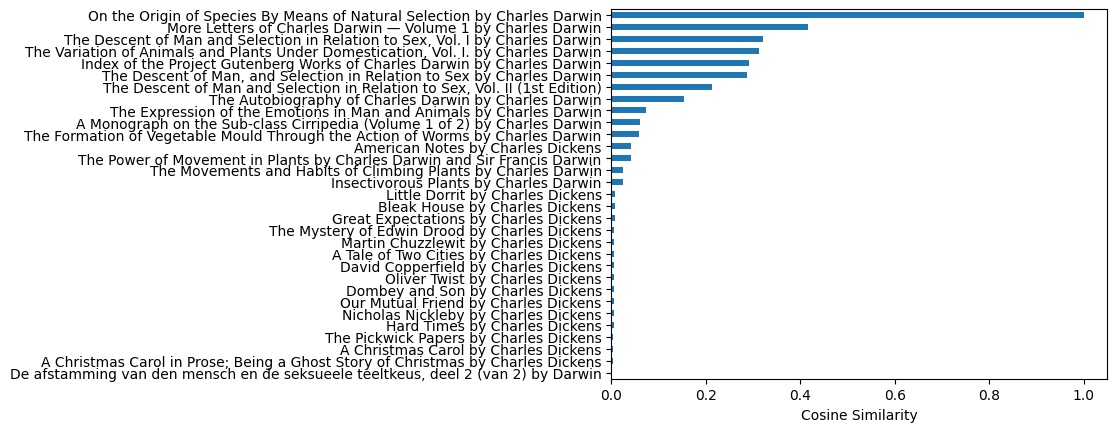

In [27]:
# This is needed to display plots in a notebook
%matplotlib inline

# Import libraries
import matplotlib.pyplot as plt

# Select the column corresponding to book_input and
# print(input_book)
v = sim_df[input_book]

# Sort by ascending scores
v_sorted = v.sort_values()

# Plot this data has a horizontal bar plot
v_sorted.plot.barh()

# Modify the axes labels and plot title for a better readability
plt.xlabel('Cosine Similarity')

In [55]:
final_recommendations = v_sorted.tail(10)[::-1]

final_recommendations

On the Origin of Species By Means of Natural Selection by Charles Darwin              1.000000
More Letters of Charles Darwin — Volume 1 by Charles Darwin                           0.416122
The Descent of Man and Selection in Relation to Sex, Vol. I by Charles Darwin         0.321533
The Variation of Animals and Plants Under Domestication, Vol. I. by Charles Darwin    0.312427
Index of the Project Gutenberg Works of Charles Darwin by Charles Darwin              0.290325
The Descent of Man, and Selection in Relation to Sex by Charles Darwin                0.287682
The Descent of Man and Selection in Relation to Sex, Vol. II (1st Edition)            0.212486
The Autobiography of Charles Darwin by Charles Darwin                                 0.153301
The Expression of the Emotions in Man and Animals by Charles Darwin                   0.073293
A Monograph on the Sub-class Cirripedia (Volume 1 of 2) by Charles Darwin             0.060506
Name: On the Origin of Species By Means of Natural

In [56]:
print("The recommendations for your book is ranked as follows: ")

for i in range(3):
  print(f"Book {i + 1}. {final_recommendations.index[i + 1]}")

The recommendations for your book is ranked as follows: 
Book 1. More Letters of Charles Darwin — Volume 1 by Charles Darwin
Book 2. The Descent of Man and Selection in Relation to Sex, Vol. I by Charles Darwin
Book 3. The Variation of Animals and Plants Under Domestication, Vol. I. by Charles Darwin
